<a href="https://colab.research.google.com/github/JOSEPHINEGEND/IP-WEEK-6-/blob/master/A_Python_Project_Predicting_the_Results_of_a_Football_Game_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Python Project: Predicting the results of a football game.

# 1.1 Introduction
 * Football is a family of team sports that involve, to varying degrees, kicking a ball to score a goal.

 * The men's FIFA World Ranking is a ranking system for men's national teams in association football.    
 * Currently led by Belgium
 
 * A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.
 
 

## 1.1.1 Defining the Question

* In this project I will be acting as a football analyst in Mchezopesa Ltd company to :

* Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (including rank of the respective team).

## 1.1.2 Metrics for Success
 * Optimal and reliable prediction Model:
    * Accuracy; 85% and above
    * With the least RMSE score achievable
    

## 1.1.3 The Context

The FIFA/Coca-Cola World Ranking is was developed by FIFA and named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.



## 1.1.4 Experimental design taken

- Perform your EDA
- Perform any necessary feature engineering
- Check of multicollinearity
- Building a model
    * Polynomial
    * Logistic
- Cross-validate the model
- Compute RMSE
- Create residual plots for the model
- Assess Heteroscedasticity using Bartlett’s test
- Challenge the solution.

## 1.1.5 Appropriateness of the available Data
* Ranking dataset
* Results dataset
* https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc

# 1.2 Importing Libraries we will use for our Analysis

In [0]:
# Importing Libraries we use for our analysis

import pandas as pd
import numpy as np
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


import pandas_profiling as pp



# 1.3 Viewing our Datasets

In [0]:
# Reading the datasets
rank = pd.read_csv('fifa_ranking.csv')
result = pd.read_csv('results.csv')

In [6]:
# Viewing the top five observation in the fifa ranking dataset
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [7]:
# Viweing the top five observation in the result dataset
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# 1.4 Exploratory Data Analysis

In [8]:
# Checking the size of the fifa ranking dataset
rank.shape

(57793, 16)

In [9]:
# checking the size of the results dataset
result.shape

(40839, 9)

In [10]:
# Viweing a summary report of the fifa ranking dataset
Report = pp.ProfileReport(rank)
Report

Number of variables,16
Number of observations,57793
Total Missing (%),0.0%
Total size in memory,7.1 MiB
Average record size in memory,128.0 B
Numeric,4
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,8


In [11]:
# Viweing a summary report of the result dataset
Report2 = pp.ProfileReport(result)
Report2

Number of variables,9
Number of observations,40839
Total Missing (%),0.0%
Total size in memory,2.5 MiB
Average record size in memory,65.0 B
Numeric,2
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [12]:
# Checking the ranking dataset information

rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [13]:
# Checking the result dataset information

result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [14]:
# Viewing the column names of the ranking dataset

rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [15]:
# Viewing the column names of the result dataset

result.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [16]:
# Checking the number of unique values in the rank dataset columns 

for column in rank.columns:
  print(rank[column].nunique())
  print(column)
  # print(rank[column].unique())
  print('\n')


209
rank


216
country_full


216
country_abrv


11114
total_points


1557
previous_points


121
rank_change


7419
cur_year_avg


7419
cur_year_avg_weighted


7473
last_year_avg


7001
last_year_avg_weighted


7575
two_year_ago_avg


6513
two_year_ago_weighted


7628
three_year_ago_avg


5849
three_year_ago_weighted


6
confederation


286
rank_date




In [17]:
# Checking the number of unique values in the result dataset columns 

for column in result.columns:
  print(column)
  print(result[column].nunique())
  #print(result[column].unique())
  print('\n')

date
15115


home_team
309


away_team
306


home_score
26


away_score
22


tournament
109


city
1960


country
266


neutral
2




In [18]:
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [19]:
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [20]:
# Creating copies of our datasets

rank2 = rank.copy()
rank2.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [21]:
result2 = result.copy()
result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# 1.5 Feature Engineering

In [0]:
# Creating a new column in the result2 dataset
# This column will contain the perfomance of the home team
# whether win, draw or loss

In [23]:
# The new column is goal_diff i.e. 
# difference in goals between the home and the away teams

result2['goal_diff'] = result2['home_score'] - result2['away_score']
result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [0]:
# Creating a function to specify whether its a win , loss or a draw based on a home team perspective
# Applying the function in a new column called Status


def home_team(home_goals):
    if home_goals > 0:
        return 'win'
    elif home_goals < 0:
        return 'loss'
    else:
        return 'draw'
      
result2['Status_home'] = result2.goal_diff.apply(lambda j: home_team(j))

In [25]:
# checking the changes in the dataset

result2.head(2)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win


In [0]:
# Creating a second function to specify whether its a win, loss or a draw based on a away team perspective
# Applying the function in a new column called Status


def away_team(away_goals):
    if away_goals < 0:
        return 'win'
    elif away_goals > 0:
        return 'loss'
    else:
        return 'draw'
      
result2['Status_Away'] = result2.goal_diff.apply(lambda w: away_team(w))

In [27]:
result2.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home,Status_Away
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss


In [0]:
# Changing the tournament type into three categories 
# Tournament type (World cup, Friendly, Other)


def tona(typ):
    if typ == 'Friendly':
        return 'Friendly'
    elif typ == 'FIFA World Cup':
        return 'World cup'
    else:
        return 'Other'
      
result2['tournament_type'] = result2.tournament.apply(lambda q: tona(q))

In [29]:
result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home,Status_Away,tournament_type
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,loss,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,draw,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,loss,Friendly


In [30]:
# Checking the number of unique values in the tournamnet column

result2.tournament_type.unique()

array(['Friendly', 'Other', 'World cup'], dtype=object)

In [0]:
# Changing the dates column in both datasets into datetime format

result2['date'] = pd.to_datetime(result2['date'])
rank2['rank_date'] = pd.to_datetime(rank2['rank_date'])

In [32]:
# Confirming that we have changed the date columns into datetime datatypes

print(result2.dtypes)
print('\n')
print(rank2.dtypes)

date               datetime64[ns]
home_team                  object
away_team                  object
home_score                  int64
away_score                  int64
tournament                 object
city                       object
country                    object
neutral                      bool
goal_diff                   int64
Status_home                object
Status_Away                object
tournament_type            object
dtype: object


rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                floa

In [0]:
# Extracting the year and month from the date column; 
# Here we will create a new column for each


result2['year'] = pd.DatetimeIndex(result2['date']).year
result2['month'] = pd.DatetimeIndex(result2['date']).month


rank2['year'] = rank2['rank_date'].dt.year
rank2['month'] = rank2['rank_date'].dt.month


In [34]:
# confirming the changes
rank2.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8


In [35]:
# confirming changes

result2.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home,Status_Away,tournament_type,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw,Friendly,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss,Friendly,1873,3


In [0]:
# changing the full country column name in ranking dataset to home_team

rank2 = rank2.rename({'country_full': 'home_team'}, axis = 1)

In [37]:
# confirming changes

rank2.head(2)

,rank,home_team,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8


In [0]:
# Dropping the columns in both datasets that we do not need before we merge

In [0]:
# Dropping unnecessary columns in rank2 dataset

rank2.drop(['country_abrv','rank_date', 'total_points', 'cur_year_avg', 'cur_year_avg_weighted' ,'last_year_avg' , 'last_year_avg_weighted' , 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg' ,'three_year_ago_weighted', 'confederation'], axis =1, inplace = True)

In [0]:
# Dropping unnecessary columns in result2 dataset

result2.drop(['date', 'goal_diff'], axis = 1, inplace = True)

In [41]:
# checking our datasets before we merge
result2.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3


In [42]:
rank2.head(2)

,rank,home_team,previous_points,rank_change,year,month
0,1,Germany,57,0,1993,8
1,2,Italy,57,0,1993,8


In [0]:
# creating copies of the datasets
rank3 = rank2.copy()
result3 = result2.copy()

## MERGING DATASETS

In [0]:
# MERGING THE DATASETS

# Based on home_team, year, month

home_merged = pd.merge(result2,rank2, how="left", on = ['home_team', 'year', 'month'])


In [45]:
# viewing our merged dataset- first five observations
home_merged.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,rank,previous_points,rank_change
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1874,3,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,draw,Friendly,1875,3,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1876,3,NaN,NaN,NaN


In [46]:
# viewing our merged dataset- last five observations
home_merged.tail()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,rank,previous_points,rank_change
40903,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,win,loss,Other,2019,7,NaN,NaN,NaN
40904,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,draw,draw,Other,2019,7,NaN,NaN,NaN
40905,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,loss,win,Other,2019,7,NaN,NaN,NaN
40906,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,loss,win,Other,2019,7,NaN,NaN,NaN
40907,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,draw,draw,Other,2019,7,NaN,NaN,NaN


In [0]:
# renaming the rank column name to home_rank

home_merged = home_merged.rename({'rank': 'home_rank'}, axis = 1)

In [48]:
# Confirming changes

home_merged.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,previous_points,rank_change
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN


In [49]:
# For the second merge: 
# We need to rename the column home_team (originally called country full) as away team so that we get their individual ranks
# 

rank3 = rank3.rename({'home_team': 'away_team'}, axis = 1)
rank3.head(2)

,rank,away_team,previous_points,rank_change,year,month
0,1,Germany,57,0,1993,8
1,2,Italy,57,0,1993,8


In [0]:
# Merging the home_merged dataset with the 
# Based on away_team, year, month

home_merged2 = pd.merge(home_merged,rank3, how="left", on = ['away_team', 'year', 'month'])

In [51]:
home_merged2.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,previous_points_x,rank_change_x,rank,previous_points_y,rank_change_y
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# renaming the rank column as away rank in the new dataframe

home_merged2 = home_merged2.rename({'rank': 'away_rank'}, axis = 1)
home_merged2.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,previous_points_x,rank_change_x,away_rank,previous_points_y,rank_change_y
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1874,3,NaN,NaN,NaN,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,draw,Friendly,1875,3,NaN,NaN,NaN,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1876,3,NaN,NaN,NaN,NaN,NaN,NaN


# 1.6 Data Cleaning

In [0]:
# In the merged dataset we a lot of missing values 
# some reasons why may include:
      # ranking began in 1993
      # we do not have the 2019 rankings 
  # Therefore I will drop the data whose ranking are unavailable 
  
home_merged2.dropna(inplace = True)

In [54]:
# confirming that there are no null values

home_merged2.isnull().sum()

home_team            0
away_team            0
home_score           0
away_score           0
tournament           0
city                 0
country              0
neutral              0
Status_home          0
Status_Away          0
tournament_type      0
year                 0
month                0
home_rank            0
previous_points_x    0
rank_change_x        0
away_rank            0
previous_points_y    0
rank_change_y        0
dtype: int64

In [55]:
# checking for duplicates

home_merged2.duplicated().sum()

62

In [0]:
# dropping the duplicates
home_merged2.drop_duplicates(inplace = True)


In [57]:
# Checking that we have no duplicates in the data
 home_merged2.duplicated().sum()

0

In [0]:
# Dropping columns in the merged dataset that we will not need while building a model
home_merged2.drop(['country', 'city', 'home_team', 'away_team', 'tournament','previous_points_x',
       'rank_change_x', 'previous_points_y', 'rank_change_y'], axis = 1, inplace = True)

In [59]:
# confirming changes

home_merged2.columns

Index(['home_score', 'away_score', 'neutral', 'Status_home', 'Status_Away',
       'tournament_type', 'year', 'month', 'home_rank', 'away_rank'],
      dtype='object')

In [60]:
# viewing our dataset after cleaning
home_merged2.head()

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,False,draw,draw,Other,1993,8,19.0,67.0
17911,0,1,False,loss,win,Other,1993,8,70.0,5.0
17912,0,0,False,draw,draw,Other,1993,8,22.0,35.0
17913,1,5,False,loss,win,Other,1993,8,94.0,8.0
17914,0,0,True,draw,draw,Other,1993,8,58.0,25.0


In [61]:
#  checking the shape of the cleaned data

home_merged2.shape

(16895, 10)

In [0]:
# Encoding the categorical columns 
#

le = LabelEncoder()
home_merged_encoded = home_merged2.apply(le.fit_transform)

In [65]:
# Confirming the changes

home_merged_encoded.head()

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,2,1,0,7,69,4
17912,0,0,0,0,0,1,0,7,21,34
17913,1,5,0,1,2,1,0,7,93,7
17914,0,0,1,0,0,1,0,7,57,24


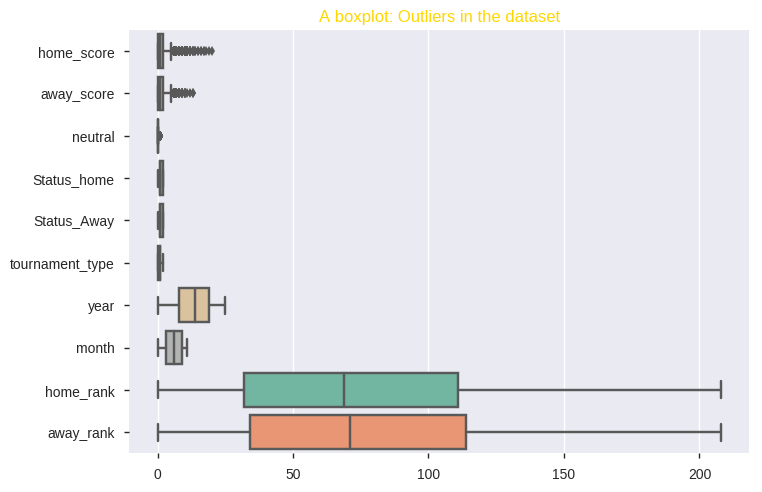

In [66]:
# checking for outliers in our dataset
# Using boxplots
# 

plt.figure(dpi = 100)
ax = sns.boxplot(data = home_merged_encoded , orient="h", palette="Set2")
plt.title('A boxplot: Outliers in the dataset', color = 'Gold')
plt.show()

The home and away score columns have a profusion of outliers.

We will not remove them in this stage, to find out if they have an effect in our model.



# 1.7 Multicollinearity
 * Checking for multicollinearity
 * Solving multicollinearity

In [67]:
# Before we build a model we shall check if
# the independent variables are collinear/ correlated to each other

# Getting the pearson correation coefficient for each of the variables

correlation = home_merged_encoded.corr()
correlation

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
home_score,1.000000,-0.164630,-0.042069,0.522603,-0.109024,0.050670,-0.038744,0.019612,-0.135755,0.320343
away_score,-0.164630,1.000000,0.100251,-0.241832,0.468678,0.034421,-0.008379,0.018170,0.221477,-0.180634
neutral,-0.042069,0.100251,1.000000,-0.045219,0.047965,0.126197,0.042915,-0.105011,0.037090,0.047561
Status_home,0.522603,-0.241832,-0.045219,1.000000,0.394717,0.045661,-0.018907,0.011666,-0.115259,0.214090
Status_Away,-0.109024,0.468678,0.047965,0.394717,1.000000,0.061724,0.004347,0.002941,0.133551,-0.088224
tournament_type,0.050670,0.034421,0.126197,0.045661,0.061724,1.000000,-0.020240,0.122963,0.069106,0.069350
year,-0.038744,-0.008379,0.042915,-0.018907,0.004347,-0.020240,1.000000,-0.002137,0.104167,0.105806
month,0.019612,0.018170,-0.105011,0.011666,0.002941,0.122963,-0.002137,1.000000,0.029475,0.030676
home_rank,-0.135755,0.221477,0.037090,-0.115259,0.133551,0.069106,0.104167,0.029475,1.000000,0.469742
away_rank,0.320343,-0.180634,0.047561,0.214090,-0.088224,0.069350,0.105806,0.030676,0.469742,1.000000


In [70]:
# checking for multicollinearity
# Using the variance Inflation Factor (VIF)
# 
# This is calculated using linear algebra inverse function

pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

# From the correlation matrix below there are no correlated independent variables as all have VIF below 5, which is the threshold

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
home_score,1.967705,-0.662885,0.056782,-1.414937,0.988514,-0.068438,0.054304,0.007171,0.367640,-0.536562
away_score,-0.662885,2.041059,-0.115694,1.294157,-1.456402,0.016108,0.028131,-0.049020,-0.359890,0.347448
neutral,0.056782,-0.115694,1.053092,0.032235,-0.013146,-0.145710,-0.040337,0.130747,0.065400,-0.117595
Status_home,-1.414937,1.294157,0.032235,2.891898,-1.950728,0.014380,0.018112,-0.021938,0.208399,-0.205861
Status_Away,0.988514,-1.456402,-0.013146,-1.950728,2.604401,-0.072525,-0.020762,0.030166,-0.184987,0.161485
tournament_type,-0.068438,0.016108,-0.145710,0.014380,-0.072525,1.048637,0.033620,-0.140691,-0.057224,-0.022798
year,0.054304,0.028131,-0.040337,0.018112,-0.020762,0.033620,1.021470,-0.003228,-0.053571,-0.101251
month,0.007171,-0.049020,0.130747,-0.021938,0.030166,-0.140691,-0.003228,1.033008,-0.006571,-0.028516
home_rank,0.367640,-0.359890,0.065400,0.208399,-0.184987,-0.057224,-0.053571,-0.006571,1.664181,-1.018724
away_rank,-0.536562,0.347448,-0.117595,-0.205861,0.161485,-0.022798,-0.101251,-0.028516,-1.018724,1.790264


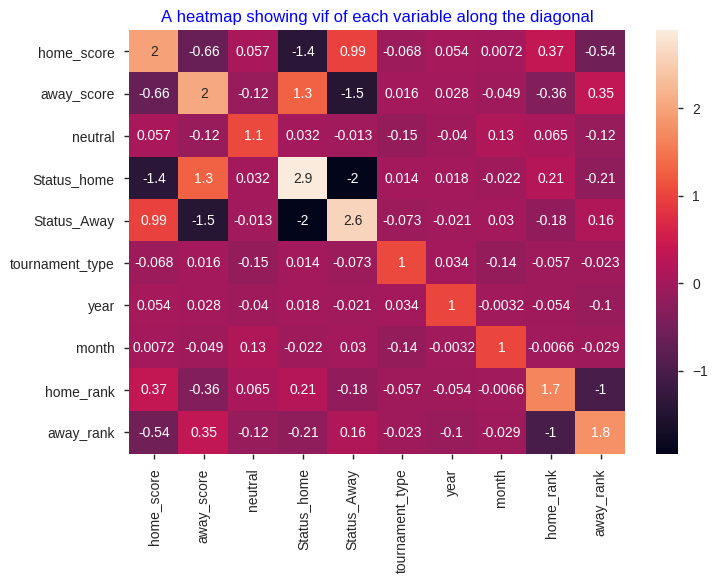

In [71]:
# Plotting a heat map to show the vif visually.
# Using the seaborn library for visualization

vif = np.linalg.inv(correlation.values)
sns.heatmap(vif, annot = True, xticklabels=['home_score' ,'away_score' ,'neutral', 'Status_home' , 'Status_Away' , 'tournament_type' , 'year', 'month' , 'home_rank' ,'away_rank'], yticklabels=['home_score' ,'away_score' ,'neutral', 'Status_home' , 'Status_Away' , 'tournament_type' , 'year', 'month' , 'home_rank' ,'away_rank'])
plt.title('A heatmap showing vif of each variable along the diagonal', color = 'blue' )
plt.show()


# 1.8 Building a Model

## 1.8.1 Polynomial Regression Model

In [0]:
# Approach 1: Polynomial approach

# What to train given:

# Rank of home team
# Rank of away team
# Tournament type

# Model 1: Predict how many goals the home team scores

# Model 2: Predict how many goals the away team scores

In [73]:
# Viewing our dataset before splitting 

home_merged_encoded.head(2)

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,2,1,0,7,69,4


In [0]:
# Model 1
# Predict how many goals the home team scores given home rank
# Splitting the dataset into the features and target variable


X = home_merged_encoded['home_rank'].values.reshape(-1, 1)

y = home_merged_encoded['home_score'].values.reshape(-1, 1)

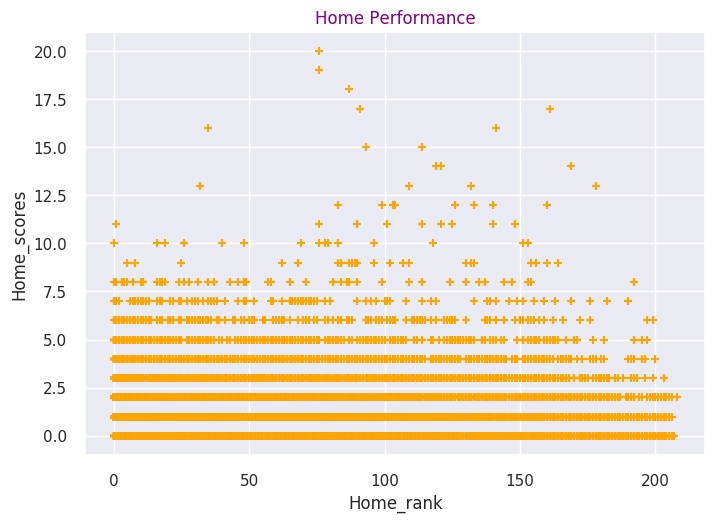

In [77]:
# Visualizing the dependent vs independent variable by plotting a scatter plot
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

sns.set(style = 'darkgrid')
plt.scatter(X,y, marker = '+' , color = 'orange') 
plt.title('Home Performance', color = 'purple')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()

# There is no particular observable trend but
# there are more points on the lower side of the scatter plot

In [0]:
# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [79]:
# Fit Linear Regression model to the dataset
# This is for comparing the linear regression model to the polynomial regression model)

reg_line = LinearRegression()
reg_line.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

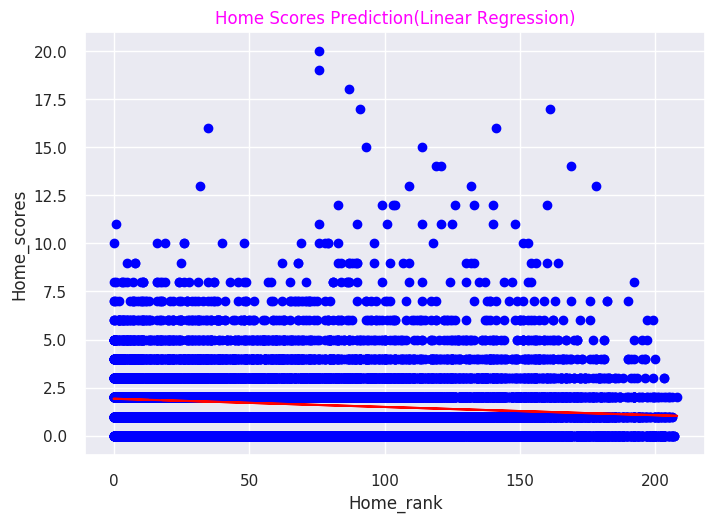

In [80]:
# Visualize the Linear Regression results
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(X, y, color='blue')
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Home Scores Prediction(Linear Regression)', color = 'magenta')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()

In [0]:
# Fitting the polynomial features to the X the independent variable

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [82]:
# Fitting a polynomial Regression to the dataset

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

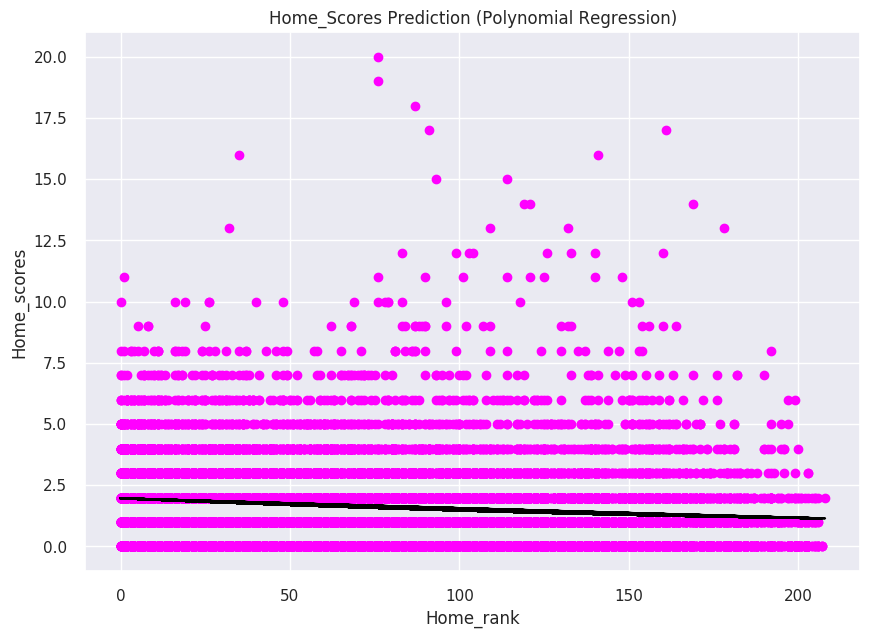

In [83]:
# Visualizing the polynomial Regression results
# Specifying the chart size
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.figure(figsize = (10,7))
plt.scatter(X, y, color='magenta')
plt.plot(X, pol_reg.predict(X_poly), color='black')
plt.title('Home_Scores Prediction (Polynomial Regression)')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()

In [0]:
# Making predictions using our model

y_pred_poly = pol_reg.predict(X_poly)

In [85]:
# Evaluation our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_poly)))
print('r2_score: ' , r2_score(y, y_pred_poly))


RMSE:  1.5880578998328967
r2_score:  0.018694481014556508


In [86]:
# Mean of the actual scores

np.mean(y)

1.6026635099141757

In [0]:
# Comparing the RMSE = 1.5 with 10% of the actual mean = 0.16

# The RMSE is very high

# Therefore this is not a good model to use for predicting the home scores

In [0]:
# Model 2: Predict how many goals the away team scores given the away team

#
X = home_merged_encoded['away_rank'].values.reshape(-1, 1)

y = home_merged_encoded['away_score'].values.reshape(-1, 1)



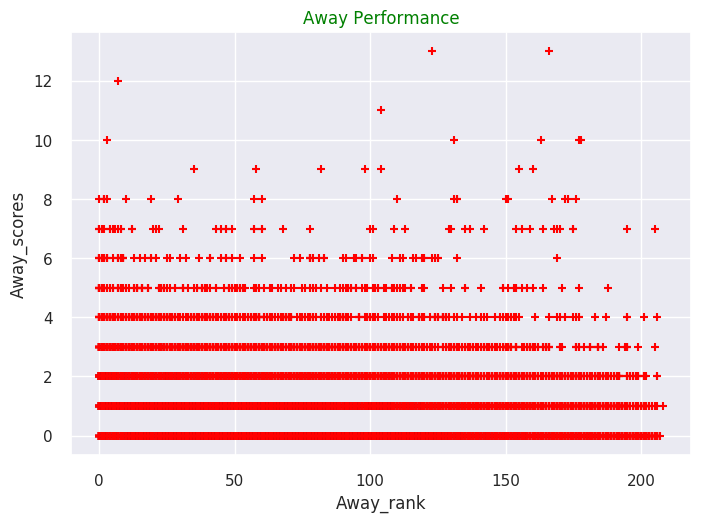

In [89]:
# Visualizing the dependent vs independent variable using a scatter plot
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

sns.set(style = 'darkgrid')
plt.scatter(X,y, marker = '+' , color = 'red') 
plt.title('Away Performance', color = 'green')
plt.xlabel('Away_rank')
plt.ylabel('Away_scores')
plt.show()

# There is no particular observable trend but
# there are more points on the lower side of the scatter plot

In [0]:
## Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [0]:
# Fitting the polynomial features to the X

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

In [92]:
# Fitting a polynomial Regression to the dataset

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

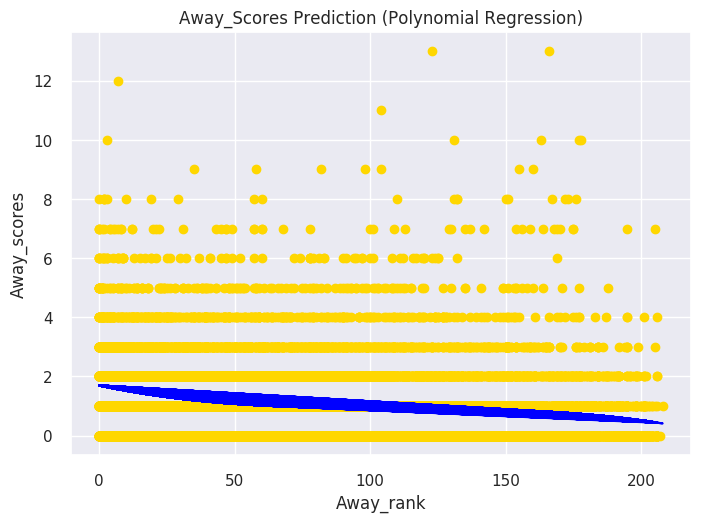

In [93]:
 # Visualizing the polynomial Regression results using a scatter plot
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(X, y, color='gold')
plt.plot(X, pol_reg.predict(X_poly), color='blue')
plt.title('Away_Scores Prediction (Polynomial Regression)')
plt.xlabel('Away_rank')
plt.ylabel('Away_scores')
plt.show()

In [0]:
# Making predictions using our model

y_pred_poly = pol_reg.predict(X_poly)

In [95]:
# Evaluating our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_poly)))
print('r2_score: ' , r2_score(y, y_pred_poly))


RMSE:  1.2165654223317743
r2_score:  0.04008131109627655


In [96]:
# Calculating the Mean of the actual scores 
# We will compare 10% of this mean with the RMSE

np.mean(y)

1.0687185557857355

In [0]:
# Comparing the RMSE = 1.2 with 10% of the actual mean = 0.1

# The RMSE is very high

# Therefore this is not a good model to use for predicting the away scores

## 1.8.1 Logistic Regression Model

In [98]:
# Viewing the first two observations before splittig our dataset

home_merged_encoded.head(2)

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,2,1,0,7,69,4


In [0]:
# Splitting our dataset
# X: independent variables
# y: dependent variable

# Splitting the data into train and test sets

X = home_merged_encoded.drop(['Status_Away', 'Status_home', 'home_score', 'away_score'], axis = 1)
y = home_merged_encoded.Status_home


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [100]:
# Fitting our model to our train sets
# Logistic Regression model in this case
# 

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

In [102]:
# Evalauting the model

# Getting the accuracy score of our model

print(accuracy_score(y_test, y_pred))

0.5880437999408109


The model can correctly predict if home team will (won, lost or drew) in a match with an accuracy of 58.8%

# 1.9 Cross-Validating the Model

In [108]:
# Using KFolds

# Splitting our dataset
# independet variables as X
# dependent variable as y

X = home_merged_encoded.drop(['Status_Away', 'Status_home', 'home_score', 'away_score'], axis = 1).values
y = home_merged_encoded.Status_home.values

# specifying the number of folds

folds = KFold(n_splits = 10)


# We now create and assess 10 models based on the folds we created.

RMSES = [] # An array of RMSEs to keep track of the RSME of each model
count = 1   # starting point # helps to keep track of the model number in training

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # Setting up the train and test based on the split determined by KFold
  # With 10 folds we split our data into training and test sets
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fitting a Logistic regression model
  LogReg = LogisticRegression()  
  LogReg.fit(X_train, y_train)
  
  # Assess the accuracy of the model
  y_pred = LogReg.predict(X_test)
  
  # Calculating the RMSES of each model
  # Appending each RMSE into the list earlier created
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  
  # printing each model RMSE
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1
  
 


Training model 1
Model 1 Root Mean Squared Error: 0.9291467104109317

Training model 2
Model 2 Root Mean Squared Error: 0.9527288741779099

Training model 3
Model 3 Root Mean Squared Error: 0.9545902804608352

Training model 4
Model 4 Root Mean Squared Error: 0.9696580254865798

Training model 5
Model 5 Root Mean Squared Error: 0.9373890466887647

Training model 6
Model 6 Root Mean Squared Error: 0.9220668214446279

Training model 7
Model 7 Root Mean Squared Error: 0.9671942783404326

Training model 8
Model 8 Root Mean Squared Error: 0.9439596382777465

Training model 9
Model 9 Root Mean Squared Error: 0.9542525802818357

Training model 10
Model 10 Root Mean Squared Error: 0.9751197342642436


In [109]:
# Printing the mean and the standard deviation of the RMSES in all the 10 models

  print(np.mean(RMSES))
  print(np.std(RMSES))
 

0.9506105989833907
0.01663309966328416


Since the standard deviation is low, the models are stable.
This is also visible in the plot below

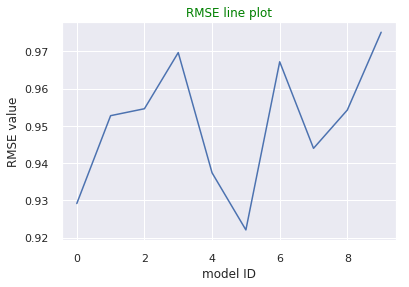

In [110]:
 # Visualizing the 10-folds RMSES using a scatter plot
# Using seaborn to plot
# Labeling y axis
# labeling the title
# Labeling the x axis.
# displaying the chart


plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.title("RMSE line plot", color = 'Green')
plt.xlabel('model ID')
plt.show()

# 2.1 Heteroskedasticity

In [0]:
# Checking heteroskedasticity in the logistic model we created


In [111]:
# First: splitting our dataset 
# Into the feature set and the target variable

X = home_merged_encoded.drop(['Status_Away', 'Status_home', 'home_score', 'away_score'], axis = 1)
y = home_merged_encoded.Status_home

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fitting a Logistic model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

# We now create the residual by subtracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Creating a summary description of the residuals:

pd.DataFrame(residuals).describe()

residuals.mean()

0.437999408108908

The mean is 0.43 indicating that we tend to be fairly correct, although slightly over estimating the home team perfomance by, on average, 43.8%



## 2.1.1 Residual Plots

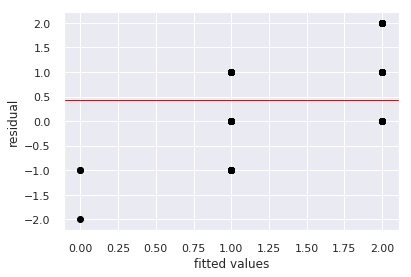

In [112]:
# Visualizing the residuals using a scatter plot 
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

## 2.1.2 Barlett's test

In [113]:
# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The variances are Homogeneous!')

3.01926898623592e-247
The variances are Homogeneous!


# 2.2 Challenging the solution 

In [0]:
# Using Hyperparameter Tuning

# Splitting the dataset into independent variables and target variable

X = home_merged_encoded.drop(['Status_Away', 'Status_home', 'home_score', 'away_score'], axis = 1)
y = home_merged_encoded.Status_home


In [0]:
# Creating the logistic Regression

logistic = LogisticRegression()


In [0]:
# Creating regularization penalty space    
#  penalty term is a constraint region or a budget 
# Regulization helps to select the preferred model complexity 
# so that the model is better at predicting

# L1: uses absolute values in the penalty function
# L2: minimizes the sum of errors

penalty = ['l1', 'l2']

# Creating regularization hyperparameter space

C = np.logspace(0, 4, 10)

# Creating hyperparameters options

hyperparameters = dict(C=C, penalty = penalty)

In [0]:
# Creating grid search using 10-fold cross validation

clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)

In [0]:
# Fitting grid search
best_model = clf.fit(X, y)

In [121]:
# Finding out the best hyperparameters available to tune the Logistic Regression model
best_model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [125]:
# Viewing best hyperparameters

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
best_model.best_score_

Best Penalty: l2
Best C: 2.7825594022071245


0.5801124593074874

In [123]:
# Predicting target vector

best_model.predict(X)

array([2, 1, 2, ..., 1, 1, 1])

# 2.3 Conclusion
* The best accuracy score using hyperparameters is 58%
* Therefore, this is most optimal predicting power using logistic regression
* Hence, another algorithm should be considered to improve the accuracy score 